<a href="https://colab.research.google.com/github/nguyenanhtienabcd/AIO2024_EXERCISE/blob/feature%2FMODULE5-WEEK4/m05w04_Ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
import numpy as np
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [5]:
# Tạo batch_size với yêu cầu ban đầu của bài toán
batch_size = 512
num_epochs = 300
lr = 0.01

In [6]:
train_dataset = FashionMNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 310kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.40MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 14.9MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True, num_workers = 4)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False, num_workers = 4)

In [8]:
class MLP(nn.Module):
  def __init__(self, input_dims, hidden_dims, output_dims):
    super(MLP, self).__init__()
    self.layer1 = nn.Linear(input_dims, hidden_dims)
    self.layer2 = nn.Linear(hidden_dims, hidden_dims)
    self.layer3 = nn.Linear(hidden_dims, hidden_dims)
    self.layer4 = nn.Linear(hidden_dims, hidden_dims)
    self.layer5 = nn.Linear(hidden_dims, hidden_dims)
    self.output = nn.Linear(hidden_dims, output_dims)
    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()


  def forward(self, x):
    x = nn.Flatten()(x) # mục đích để chuyển dữ liệu ảnh thành vector
    x = self.layer1(x)
    x = self.sigmoid(x)
    x = self.layer2(x)
    x = self.sigmoid(x)
    x = self.layer3(x)
    x = self.sigmoid(x)
    x = self.layer4(x)
    x = self.sigmoid(x)
    x = self.layer5(x)
    x = self.sigmoid(x)
    out = self.output(x)
    return out

## SGD

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0, weight_decay=0)

In [ ]:
# khởi tạo trọng số
def initialize_weights():
  for m in model.modules():
    if isinstance(m, nn.Linear):
      nn.init.normal_(m.weight, mean = 0.0, std=0.05)
      if m.bias is not None:
        nn.init.constant_(m.bias, 0)

In [ ]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
  print(f'Epoch {epoch+1}/{num_epochs}')
  train_loss = 0
  train_acc = 0
  # xác định phần train
  model.train()
  for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    _, pred = torch.max(output, dim=1)
    train_acc += torch.sum(pred == y).item()

  train_losses.append(train_loss / len(train_loader))
  train_accs.append(train_acc / len(train_dataset))

  model.eval()
  val_loss = 0
  val_acc = 0
  with torch.no_grad():
    for x, y in test_loader:
      x = x.to(device)
      y = y.to(device)
      output = model(x)
      loss = criterion(output, y)
      val_loss += loss.item()
      _, pred = torch.max(output, dim=1)
      val_acc += torch.sum(pred == y).item()

  val_losses.append(val_loss / len(test_loader))
  val_accs.append(val_acc / len(test_dataset))



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

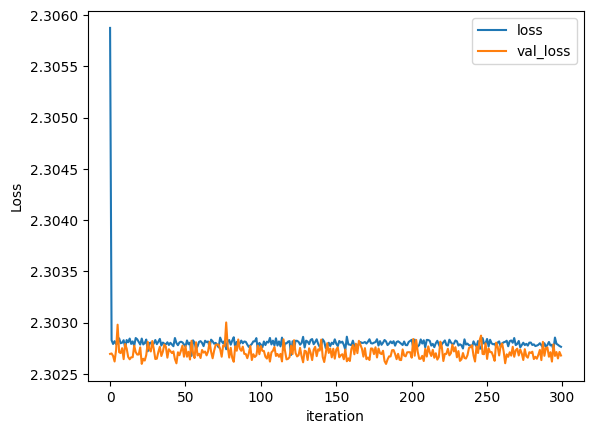

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

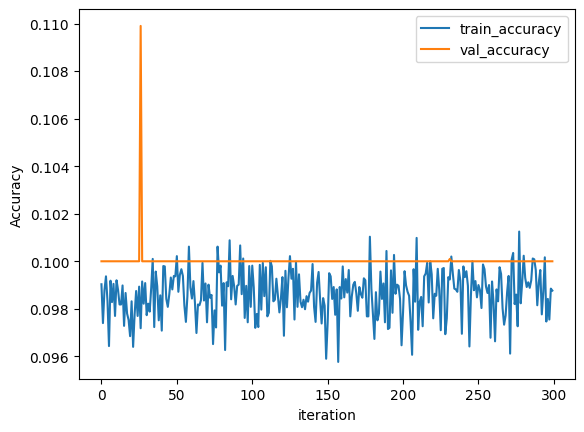

In [ ]:
plt.plot(train_accs, label='train_accuracy')
plt.plot(val_accs, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## SGD + momentum

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.5, weight_decay=0)

In [ ]:
# khởi tạo trọng số
def initialize_weights():
  for m in model.modules():
    if isinstance(m, nn.Linear):
      nn.init.normal_(m.weight, mean = 0.0, std=0.05)
      if m.bias is not None:
        nn.init.constant_(m.bias, 0)

In [ ]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
  print(f'Epoch {epoch+1}/{num_epochs}')
  train_loss = 0
  train_acc = 0
  # xác định phần train
  model.train()
  for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    _, pred = torch.max(output, dim=1)
    train_acc += torch.sum(pred == y).item()

  train_losses.append(train_loss / len(train_loader))
  train_accs.append(train_acc / len(train_dataset))

  model.eval()
  val_loss = 0
  val_acc = 0
  with torch.no_grad():
    for x, y in test_loader:
      x = x.to(device)
      y = y.to(device)
      output = model(x)
      loss = criterion(output, y)
      val_loss += loss.item()
      _, pred = torch.max(output, dim=1)
      val_acc += torch.sum(pred == y).item()

  val_losses.append(val_loss / len(test_loader))
  val_accs.append(val_acc / len(test_dataset))



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

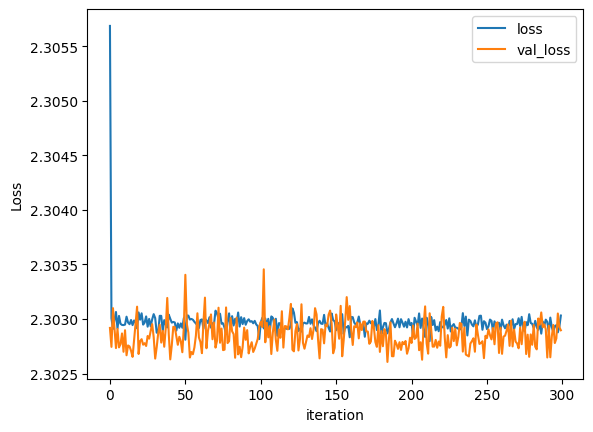

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

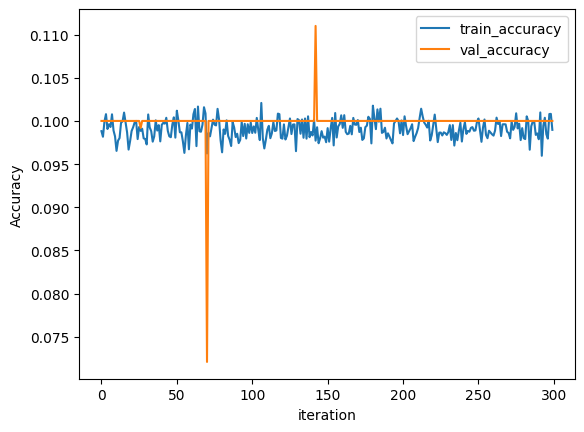

In [ ]:
plt.plot(train_accs, label='train_accuracy')
plt.plot(val_accs, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## RMSProp

In [ ]:
alpha = 0.99
momentum = 0.9
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=lr, alpha=alpha, momentum=momentum, weight_decay=0)

In [ ]:
# khởi tạo trọng số
def initialize_weights():
  for m in model.modules():
    if isinstance(m, nn.Linear):
      nn.init.normal_(m.weight, mean = 0.0, std=0.05)
      if m.bias is not None:
        nn.init.constant_(m.bias, 0)

In [15]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
  print(f'Epoch {epoch+1}/{num_epochs}')
  train_loss = 0
  train_acc = 0
  # xác định phần train
  model.train()
  for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    _, pred = torch.max(output, dim=1)
    train_acc += torch.sum(pred == y).item()

  train_losses.append(train_loss / len(train_loader))
  train_accs.append(train_acc / len(train_dataset))

  model.eval()
  val_loss = 0
  val_acc = 0
  with torch.no_grad():
    for x, y in test_loader:
      x = x.to(device)
      y = y.to(device)
      output = model(x)
      loss = criterion(output, y)
      val_loss += loss.item()
      _, pred = torch.max(output, dim=1)
      val_acc += torch.sum(pred == y).item()

  val_losses.append(val_loss / len(test_loader))
  val_accs.append(val_acc / len(test_dataset))



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

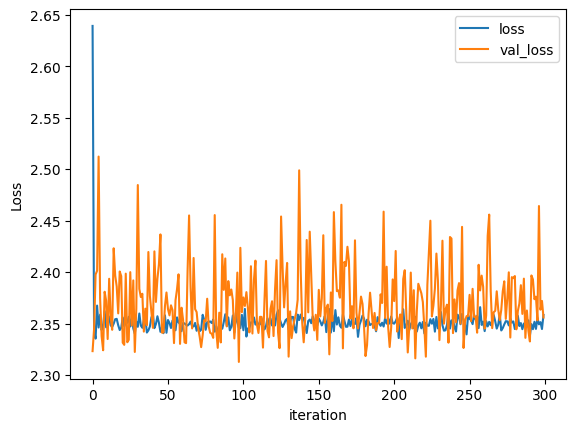

In [16]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

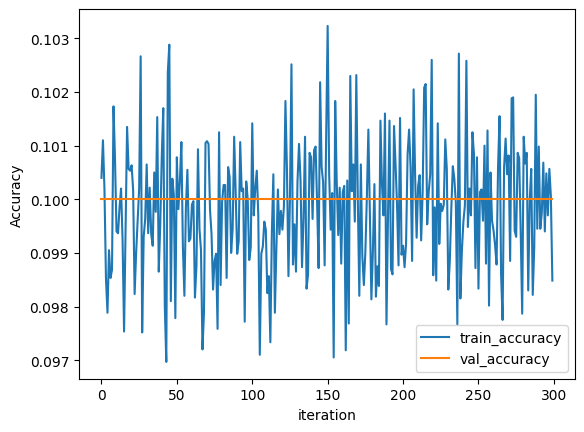

In [17]:
plt.plot(train_accs, label='train_accuracy')
plt.plot(val_accs, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## ADAM

In [ ]:
model = MLP(input_dims=784, hidden_dims=128, output_dims=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=0)

In [ ]:
# khởi tạo trọng số
def initialize_weights():
  for m in model.modules():
    if isinstance(m, nn.Linear):
      nn.init.normal_(m.weight, mean = 0.0, std=0.05)
      if m.bias is not None:
        nn.init.constant_(m.bias, 0)

In [10]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
for epoch in range(num_epochs):
  print(f'Epoch {epoch+1}/{num_epochs}')
  train_loss = 0
  train_acc = 0
  # xác định phần train
  model.train()
  for x, y in train_loader:
    x = x.to(device)
    y = y.to(device)
    optimizer.zero_grad()
    output = model(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    _, pred = torch.max(output, dim=1)
    train_acc += torch.sum(pred == y).item()

  train_losses.append(train_loss / len(train_loader))
  train_accs.append(train_acc / len(train_dataset))

  model.eval()
  val_loss = 0
  val_acc = 0
  with torch.no_grad():
    for x, y in test_loader:
      x = x.to(device)
      y = y.to(device)
      output = model(x)
      loss = criterion(output, y)
      val_loss += loss.item()
      _, pred = torch.max(output, dim=1)
      val_acc += torch.sum(pred == y).item()

  val_losses.append(val_loss / len(test_loader))
  val_accs.append(val_acc / len(test_dataset))



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

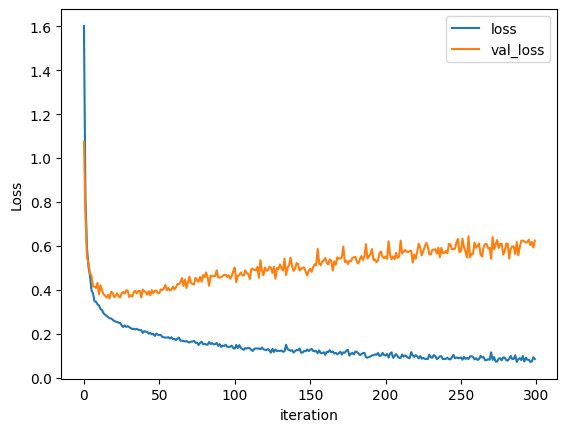

In [11]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

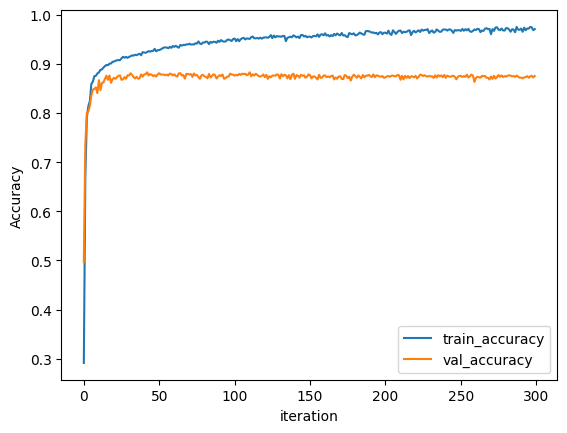

In [12]:
plt.plot(train_accs, label='train_accuracy')
plt.plot(val_accs, label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

## ADOPT